In [1]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.10" 2021-01-19
OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


In [2]:
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz

In [3]:
!tar xf spark-2.4.7-bin-hadoop2.7.tgz

In [4]:
!pip install -q findspark

In [5]:
#To find the GPU information allocated to play with run the below snippet of code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

Gen RAM Free: 12.7 GB  | Proc size: 118.8 MB
GPU RAM Free: 15109MB | Used: 0MB | Util   0% | Total 15109MB


In [6]:
import os
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"
import findspark
findspark.init()

In [7]:
import pyspark
print(pyspark.__version__)

2.4.7


In [8]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .config("spark.jars.packages", "com.crealytics:spark-excel_2.11:0.12.2") \
    .appName("Learning_Spark") \
    .getOrCreate()

#.config("spark.jars.packages", "com.crealytics:spark-excel_2.11:0.12.2") \

In [9]:
from google.colab import files
files.upload()

Saving CS551G_DMV_Assessment_2_Dataset.xlsx to CS551G_DMV_Assessment_2_Dataset.xlsx


{'CS551G_DMV_Assessment_2_Dataset.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00\x87V\xe12\x86\x01\x00\x00\x99\x06\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

# New section

In [9]:
#read the file using spark read command
data = spark.read.format("com.crealytics.spark.excel").option("useHeader", "true").option("inferSchema", "true").load("CS551G_DMV_Assessment_2_Dataset.xlsx")

# dropping 'Status' column
copy_data = data.drop('Status')
print(copy_data.count(), len(copy_data.columns))
display(copy_data)

# # you may want to count the data and show them to understand what is all about
# print(data.count(), len(data.columns))

# print out the schema
copy_data.show(5)
copy_data.printSchema()

#show the data description
copy_data.describe().show()
copy_data.summary().show()


996 12


DataFrame[Temperature_Sensor_1: double, Temperature_Sensor_2: double, Temperature_Sensor_3: double, Flow_Rate_Sensor_1: double, Flow_Rate_Sensor_2: double, Flow_Rate_Sensor_3: double, Pressure _sensor_1: double, Pressure _sensor_2: double, Pressure _sensor_3: double, Vibration_Sensor_1: double, Vibration_Sensor_2: double, Vibration_Sensor_3: double]

+--------------------+--------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|Temperature_Sensor_1|Temperature_Sensor_2|Temperature_Sensor_3|Flow_Rate_Sensor_1|Flow_Rate_Sensor_2|Flow_Rate_Sensor_3|Pressure _sensor_1|Pressure _sensor_2|Pressure _sensor_3|Vibration_Sensor_1|Vibration_Sensor_2|Vibration_Sensor_3|
+--------------------+--------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|              4.5044|              0.7443|                6.34|            1.9052|           29.5315|            0.8647|            2.2044|             6.048|           14.4659|            21.648|           15.3429|            1.2186|
|              4.4284|              0.9073|             

In [10]:
from pyspark.sql.functions import col,sum
copy_data.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in copy_data.columns)).show()

+--------------------+--------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|Temperature_Sensor_1|Temperature_Sensor_2|Temperature_Sensor_3|Flow_Rate_Sensor_1|Flow_Rate_Sensor_2|Flow_Rate_Sensor_3|Pressure _sensor_1|Pressure _sensor_2|Pressure _sensor_3|Vibration_Sensor_1|Vibration_Sensor_2|Vibration_Sensor_3|
+--------------------+--------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|                   0|                   0|                   0|                 0|                 0|                 0|                 0|                 0|                 0|                 0|                 0|                 0|
+--------------------+--------------------+-------------

In [12]:
!pip install handyspark

     |████████████████████████████████| 212.3MB 72kB/s 
     |████████████████████████████████| 204kB 18.5MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767604 sha256=e967977d290c08fb04abb28091995202c695165cf4c8d5985388e67cd65c5664
  Stored in directory: /root/.cache/pip/wheels/0b/90/c0/01de724414ef122bd05f056541fb6a0ecf47c7ca655f8b3c0f
Successfully built pyspark


In [11]:
from handyspark import *

hdf = data.toHandy()
hdf

HandyFrame[Status: string, Temperature_Sensor_1: double, Temperature_Sensor_2: double, Temperature_Sensor_3: double, Flow_Rate_Sensor_1: double, Flow_Rate_Sensor_2: double, Flow_Rate_Sensor_3: double, Pressure _sensor_1: double, Pressure _sensor_2: double, Pressure _sensor_3: double, Vibration_Sensor_1: double, Vibration_Sensor_2: double, Vibration_Sensor_3: double]

In [12]:
hdf.isnull(ratio=True)

Status                  0.0
Temperature_Sensor_1    0.0
Temperature_Sensor_2    0.0
Temperature_Sensor_3    0.0
Flow_Rate_Sensor_1      0.0
Flow_Rate_Sensor_2      0.0
Flow_Rate_Sensor_3      0.0
Pressure _sensor_1      0.0
Pressure _sensor_2      0.0
Pressure _sensor_3      0.0
Vibration_Sensor_1      0.0
Vibration_Sensor_2      0.0
Vibration_Sensor_3      0.0
Name: missing(ratio), dtype: float64

In [13]:
vib_sens1_norm = hdf.filter(hdf['Status'] == 'Normal')
vib_sens1_norm = vib_sens1_norm.select("Vibration_Sensor_1")
vib_sens1_norm = vib_sens1_norm.selectExpr("Vibration_Sensor_1 as Normal")
print(vib_sens1_norm.count(), len(vib_sens1_norm.columns))
display(vib_sens1_norm)
vib_sens1_norm.show(5)

vib_sens1_abnorm = hdf.filter(hdf['Status'] == 'Abnormal')
vib_sens1_abnorm = vib_sens1_abnorm.select("Vibration_Sensor_1")
vib_sens1_abnorm = vib_sens1_abnorm.selectExpr("Vibration_Sensor_1 as Abnormal")
print(vib_sens1_abnorm.count(), len(vib_sens1_abnorm.columns))
display(vib_sens1_abnorm)
vib_sens1_abnorm.show(5)

import pyspark.sql.functions as F
from pyspark.sql.functions import monotonically_increasing_id, row_number
from pyspark.sql.window import Window

# since there is no common column between these two dataframes add row_index so that it can be joined
vib_sens1_norm=vib_sens1_norm.withColumn('row_index', row_number().over(Window.orderBy(monotonically_increasing_id())))
vib_sens1_abnorm=vib_sens1_abnorm.withColumn('row_index', row_number().over(Window.orderBy(monotonically_increasing_id())))

vib_sens1 = vib_sens1_norm.join(vib_sens1_abnorm, on=["row_index"]).drop("row_index")
print(vib_sens1.count(), len(vib_sens1.columns))
display(vib_sens1)
vib_sens1.show(5)

498 1


HandyFrame[Normal: double]

+-------+
| Normal|
+-------+
| 21.648|
| 0.0646|
|11.0779|
| 1.8463|
|   9.37|
+-------+
only showing top 5 rows

498 1


HandyFrame[Abnormal: double]

+--------+
|Abnormal|
+--------+
| 17.5954|
| 18.3339|
| 10.9209|
|  10.884|
|  3.8588|
+--------+
only showing top 5 rows

498 2


HandyFrame[Normal: double, Abnormal: double]

+-------+--------+
| Normal|Abnormal|
+-------+--------+
| 21.648| 17.5954|
| 0.0646| 18.3339|
|11.0779| 10.9209|
| 1.8463|  10.884|
|   9.37|  3.8588|
+-------+--------+
only showing top 5 rows



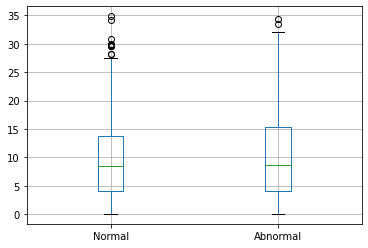

In [14]:
#import matplotlib.pyplot as plt

vib_sens1.cols[['Normal', 'Abnormal']].boxplot()


In [15]:
vib_sens2_norm = hdf.filter(hdf['Status'] == 'Normal')
vib_sens2_norm = vib_sens2_norm.select("Vibration_Sensor_2")
vib_sens2_norm = vib_sens2_norm.selectExpr("Vibration_Sensor_2 as Normal")
print(vib_sens2_norm.count(), len(vib_sens2_norm.columns))
display(vib_sens2_norm)
vib_sens2_norm.show(5)

vib_sens2_abnorm = hdf.filter(hdf['Status'] == 'Abnormal')
vib_sens2_abnorm = vib_sens2_abnorm.select("Vibration_Sensor_2")
vib_sens2_abnorm = vib_sens2_abnorm.selectExpr("Vibration_Sensor_2 as Abnormal")
print(vib_sens2_abnorm.count(), len(vib_sens2_abnorm.columns))
display(vib_sens2_abnorm)
vib_sens2_abnorm.show(5)

# import pyspark.sql.functions as F
# from pyspark.sql.functions import monotonically_increasing_id, row_number
# from pyspark.sql.window import Window

# since there is no common column between these two dataframes add row_index so that it can be joined
vib_sens2_norm=vib_sens2_norm.withColumn('row_index', row_number().over(Window.orderBy(monotonically_increasing_id())))
vib_sens2_abnorm=vib_sens2_abnorm.withColumn('row_index', row_number().over(Window.orderBy(monotonically_increasing_id())))

vib_sens2 = vib_sens2_norm.join(vib_sens2_abnorm, on=["row_index"]).drop("row_index")
print(vib_sens2.count(), len(vib_sens2.columns))
display(vib_sens2)
vib_sens2.show(5)

498 1


HandyFrame[Normal: double]

+-------+
| Normal|
+-------+
|15.3429|
|14.8813|
|25.0914|
| 28.664|
|34.8122|
+-------+
only showing top 5 rows

498 1


HandyFrame[Abnormal: double]

+--------+
|Abnormal|
+--------+
| 14.1982|
|  7.7637|
|  1.0247|
| 20.5033|
|  7.6437|
+--------+
only showing top 5 rows

498 2


HandyFrame[Normal: double, Abnormal: double]

+-------+--------+
| Normal|Abnormal|
+-------+--------+
|15.3429| 14.1982|
|14.8813|  7.7637|
|25.0914|  1.0247|
| 28.664| 20.5033|
|34.8122|  7.6437|
+-------+--------+
only showing top 5 rows



In [28]:
colors = {'Normal':'blue', 'Abnormal':'red'}

vib_sens2.cols[['Normal', 'Abnormal']].scatterplot()
#for col in vib_sens2:color=['blue','red']
  

SyntaxError: ignored

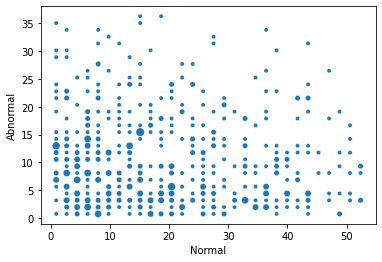

In [16]:

vib_sens2.cols[['Normal', 'Abnormal']].scatterplot()

# Random Forest

In [17]:
data.columns

['Status',
 'Temperature_Sensor_1',
 'Temperature_Sensor_2',
 'Temperature_Sensor_3',
 'Flow_Rate_Sensor_1',
 'Flow_Rate_Sensor_2',
 'Flow_Rate_Sensor_3',
 'Pressure _sensor_1',
 'Pressure _sensor_2',
 'Pressure _sensor_3',
 'Vibration_Sensor_1',
 'Vibration_Sensor_2',
 'Vibration_Sensor_3']

In [18]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols = ['Temperature_Sensor_1','Temperature_Sensor_2','Temperature_Sensor_3','Flow_Rate_Sensor_1','Flow_Rate_Sensor_2','Flow_Rate_Sensor_3','Pressure _sensor_1','Pressure _sensor_2','Pressure _sensor_3','Vibration_Sensor_1','Vibration_Sensor_2','Vibration_Sensor_3'], outputCol = 'features')

In [19]:
output = assembler.transform(data)

In [20]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol = 'Status', outputCol = 'StatusIndex')
outputFixed = indexer.fit(output).transform(output)
outputFixed.printSchema()

root
 |-- Status: string (nullable = true)
 |-- Temperature_Sensor_1: double (nullable = true)
 |-- Temperature_Sensor_2: double (nullable = true)
 |-- Temperature_Sensor_3: double (nullable = true)
 |-- Flow_Rate_Sensor_1: double (nullable = true)
 |-- Flow_Rate_Sensor_2: double (nullable = true)
 |-- Flow_Rate_Sensor_3: double (nullable = true)
 |-- Pressure _sensor_1: double (nullable = true)
 |-- Pressure _sensor_2: double (nullable = true)
 |-- Pressure _sensor_3: double (nullable = true)
 |-- Vibration_Sensor_1: double (nullable = true)
 |-- Vibration_Sensor_2: double (nullable = true)
 |-- Vibration_Sensor_3: double (nullable = true)
 |-- features: vector (nullable = true)
 |-- StatusIndex: double (nullable = false)



In [21]:
final_df = outputFixed.select('features', 'StatusIndex')
final_df.show(3)


+--------------------+-----------+
|            features|StatusIndex|
+--------------------+-----------+
|[4.5044,0.7443,6....|        1.0|
|[4.4284,0.9073,5....|        1.0|
|[4.5291,1.0199,6....|        1.0|
+--------------------+-----------+
only showing top 3 rows



In [22]:
train, test = final_df.randomSplit([0.7, 0.3])

In [23]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(labelCol = 'StatusIndex', featuresCol = 'features')


In [24]:
rf_model = rf.fit(train)

In [41]:
# from pyspark.ml import Pipeline

# # Chain indexers and forest in a Pipeline
# pipeline = Pipeline(stages=['StatusIndex', 'features', rf])

# # Train model.  This also runs the indexers.
# model = pipeline.fit(train)


# Evaluation

Use the following three metrics to report the model’s performance, i.e. Precision/Recall, Accuracy and Area under the curve (AUROC).

In [25]:
rf_predictions = rf_model.transform(test)
# Select example rows to display.
rf_predictions.show(5)

+--------------------+-----------+--------------------+--------------------+----------+
|            features|StatusIndex|       rawPrediction|         probability|prediction|
+--------------------+-----------+--------------------+--------------------+----------+
|[0.0851,5.8301,7....|        1.0|[8.06570440573928...|[0.40328522028696...|       1.0|
|[0.2719,5.1517,7....|        1.0|[8.94890189510308...|[0.44744509475515...|       1.0|
|[0.7059,8.4814,8....|        1.0|[11.1116987095763...|[0.55558493547881...|       0.0|
|[0.7828,6.2814,7....|        1.0|[7.91387181183394...|[0.39569359059169...|       1.0|
|[0.8276,11.4771,1...|        1.0|[10.8723727121294...|[0.54361863560647...|       0.0|
+--------------------+-----------+--------------------+--------------------+----------+
only showing top 5 rows



In [26]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

binary_evaluator = BinaryClassificationEvaluator(labelCol = 'StatusIndex')
#print('Random Forest areaUnderROC:' , binary_evaluator.evaluate(rf_predictions))
print("Test Area Under ROC: " + str(binary_evaluator.evaluate(rf_predictions, {binary_evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.9315235690235681


In [27]:
print("Test Area Under PR: " + str(binary_evaluator.evaluate(rf_predictions, {binary_evaluator.metricName: "areaUnderPR"})))

Test Area Under PR: 0.9477859801041235


In [28]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

acc_evaluator = MulticlassClassificationEvaluator(
    labelCol="StatusIndex", predictionCol="prediction", metricName="accuracy")
accuracy = acc_evaluator.evaluate(rf_predictions)
print("Test Accuracy = %g" % (accuracy))

Test Accuracy = 0.84466


In [29]:

predictions = [i[0] for i in rf_predictions.select('prediction').collect()]
labels = [k[0] for k in rf_predictions.select('StatusIndex').collect()]
print(len(predictions), len(labels))
print(predictions,"\n", labels)
predictionAndLabels = spark.sparkContext.parallelize(list(zip(predictions, labels)))

#predictionAndLabels = rf_predictions.map(lambda lp: lp.prediction, lp.StatusIndex)

#predictionAndLabels = list(rf_predictions.select('prediction', 'StatusIndex').rdd.map(lambda row: row[0]).collect())
print(predictionAndLabels)


309 309
[1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0

In [30]:
from pyspark.mllib.evaluation import MulticlassMetrics

# Instantiate metrics object
metrics = MulticlassMetrics(predictionAndLabels)

precision = metrics.precision()
recall = metrics.recall()

print("Precision = %s" % precision)
print("Recall = %s" % recall)

Precision = 0.8446601941747572
Recall = 0.8446601941747572


Multilayer perceptron classifier 

In [31]:
final_df.show(3)
mpc_final_df = final_df.withColumnRenamed('StatusIndex', 'label')
train, test = mpc_final_df.randomSplit([0.7, 0.3])
train.show(3)
test.show(3)


+--------------------+-----------+
|            features|StatusIndex|
+--------------------+-----------+
|[4.5044,0.7443,6....|        1.0|
|[4.4284,0.9073,5....|        1.0|
|[4.5291,1.0199,6....|        1.0|
+--------------------+-----------+
only showing top 3 rows

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[0.0861,4.8303,6....|  1.0|
|[0.1117,6.2585,6....|  1.0|
|[0.1447,5.5261,7....|  1.0|
+--------------------+-----+
only showing top 3 rows

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[0.0851,5.8301,7....|  1.0|
|[0.1382,4.9429,8....|  1.0|
|[0.2719,5.1517,7....|  1.0|
+--------------------+-----+
only showing top 3 rows



In [32]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# specify layers for the neural network:
# input layer of size 12 (features), 4 intermediate of size 16, 12, 8 and 4
# and output of size 2 (classes)
layers = [12, 16, 12, 8, 4, 2]

# create the trainer and set its parameters
trainer = MultilayerPerceptronClassifier(maxIter=1000, layers=layers, blockSize=128, seed=1234)

# train the model
mpc_model = trainer.fit(train)

In [33]:
# compute accuracy on the test set
mpc_pred = mpc_model.transform(test)
print(mpc_pred)
mpc_pred.show(5)

mpc_predictionAndLabels = mpc_pred.select("prediction", "label")
mpc_evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
mpc_accuracy = mpc_evaluator.evaluate(mpc_predictionAndLabels)
print("Test Accuracy = %g" % (mpc_accuracy))

DataFrame[features: vector, label: double, rawPrediction: vector, probability: vector, prediction: double]
+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[0.0851,5.8301,7....|  1.0|[-2.1769426790394...|[0.00226782669347...|       1.0|
|[0.1382,4.9429,8....|  1.0|[3.42147669849687...|[0.99614775388559...|       0.0|
|[0.2719,5.1517,7....|  1.0|[-2.1742073290666...|[0.00227938396952...|       1.0|
|[0.4724,4.9612,8....|  1.0|[5.18209878588053...|[0.99989700270245...|       0.0|
|[0.6262,9.0225,9....|  1.0|[-1.7479102462057...|[0.00507229366128...|       1.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows

Test Accuracy = 0.788274


In [34]:
mpc_binary_evaluator = BinaryClassificationEvaluator(labelCol = 'label')
#print('Random Forest areaUnderROC:' , binary_evaluator.evaluate(rf_predictions))
print("Test Area Under ROC: " + str(mpc_binary_evaluator.evaluate(mpc_pred, {mpc_binary_evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8424010217113657


In [35]:
print("Test Area Under Precision/Recall: " + str(mpc_binary_evaluator.evaluate(mpc_pred, {mpc_binary_evaluator.metricName: "areaUnderPR"})))

Test Area Under Precision/Recall: 0.8458938790398447


In [36]:

mpc_predictions = [i[0] for i in mpc_pred.select('prediction').collect()]
mpc_labels = [k[0] for k in mpc_pred.select('label').collect()]
mpc_eval_predAndLabels = spark.sparkContext.parallelize(list(zip(mpc_predictions, mpc_labels)))

print(mpc_eval_predAndLabels)


ParallelCollectionRDD[1732] at parallelize at PythonRDD.scala:195


In [37]:
# Instantiate metrics object
mpc_metrics = MulticlassMetrics(mpc_eval_predAndLabels)

mpc_precision = mpc_metrics.precision()
mpc_recall = mpc_metrics.recall()

print("Precision = %s" % mpc_precision)
print("Recall = %s" % mpc_recall)

Precision = 0.7882736156351792
Recall = 0.7882736156351792


# Bonus Task

In [75]:
bonus = outputFixed.select('features', 'Status')
bonus.show(3)


+--------------------+------+
|            features|Status|
+--------------------+------+
|[4.5044,0.7443,6....|Normal|
|[4.4284,0.9073,5....|Normal|
|[4.5291,1.0199,6....|Normal|
+--------------------+------+
only showing top 3 rows



In [76]:
train_df, test_df = bonus.randomSplit([0.7, 0.3])

In [77]:
string_indexer = StringIndexer(inputCol="Status", outputCol="index_status")
fitted_indexer = string_indexer.fit(train_df)
indexed_df = fitted_indexer.transform(train_df)

In [78]:
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)
fitted_scaler = scaler.fit(indexed_df)
scaled_df = fitted_scaler.transform(indexed_df)

In [79]:
scaled_df.show(10)

+--------------------+------+------------+--------------------+
|            features|Status|index_status|     scaled_features|
+--------------------+------+------------+--------------------+
|[0.0851,5.8301,7....|Normal|         1.0|[-1.7612346158876...|
|[0.0861,4.8303,6....|Normal|         1.0|[-1.7608774039677...|
|[0.1382,4.9429,8....|Normal|         1.0|[-1.7422666629412...|
|[0.1447,5.5261,7....|Normal|         1.0|[-1.7399447854618...|
|[0.2325,4.9466,6....|Normal|         1.0|[-1.7085815788951...|
|[0.2719,5.1517,7....|Normal|         1.0|[-1.6945074292512...|
|[0.2811,4.52,8.04...|Normal|         1.0|[-1.6912210795882...|
|[0.2985,5.9555,8....|Normal|         1.0|[-1.6850055921820...|
|[0.3983,5.5316,5....|Normal|         1.0|[-1.6493558425765...|
|[0.4724,4.9612,8....|Normal|         1.0|[-1.6228864393122...|
+--------------------+------+------------+--------------------+
only showing top 10 rows



In [80]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.core import Dense, Dropout, Activation
from tensorflow.python.keras.utils import np_utils, generic_utils

nb_classes = train_df.select("Status").distinct().count()
input_dim = len(train_df.select("features").first()[0])
print(nb_classes, input_dim)

model = Sequential()
model.add(Dense(512, input_shape=(input_dim,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

2 12


In [54]:
!pip install -q elephas
!pip install --ignore-installed PyYAML

     |████████████████████████████████| 337kB 11.1MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 645kB 7.4MB/s 


In [82]:
from elephas.ml_model import ElephasEstimator
#from tensorflow.python.keras import optimizers
from tensorflow import keras

adam = keras.optimizers.Adam(lr=0.003)
opt_conf = optimizers.serialize(adam)

# Initialize SparkML Estimator and set all relevant properties
estimator = ElephasEstimator()
estimator.setFeaturesCol("scaled_features")             # These two come directly from pyspark,
estimator.setLabelCol("index_status")                 # hence the camel case. Sorry :)
estimator.set_keras_model_config(model.to_yaml())       # Provide serialized Keras model
estimator.set_categorical_labels(True)
estimator.set_nb_classes(nb_classes)
estimator.set_num_workers(1)  # We just use one worker here. Feel free to adapt it.
estimator.set_epochs(20) 
estimator.set_batch_size(128)
estimator.set_verbosity(1)
estimator.set_validation_split(0.15)
estimator.set_optimizer_config(opt_conf)
estimator.set_mode("synchronous")
estimator.set_loss("categorical_crossentropy")
estimator.set_metrics(['acc'])

ElephasEstimator_45abf125b283

In [85]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[string_indexer, scaler, estimator])

In [91]:
from pyspark.mllib.evaluation import MulticlassMetrics

fitted_pipeline = pipeline.fit(train_df) # Fit model to data

prediction = fitted_pipeline.transform(test_df) # Evaluate on test data.
#prediction = fitted_pipeline.transform(test_df) # <-- The same code evaluates test data.
pnl = prediction.select("index_status", "prediction")
pnl.show(10)

>>> Fit model
>>> Synchronous training complete.
+------------+--------------------+
|index_status|          prediction|
+------------+--------------------+
|         1.0|[0.01479736622422...|
|         1.0|[0.42840147018432...|
|         1.0|[0.23763343691825...|
|         1.0|[0.00111016177106...|
|         1.0|[0.00121192040387...|
|         1.0|[0.00418216455727...|
|         1.0|[2.26613861741498...|
|         1.0|[0.14957541227340...|
|         1.0|[0.44166645407676...|
|         1.0|[0.03204603493213...|
+------------+--------------------+
only showing top 10 rows



In [ ]:
prediction_and_label = pnl.rdd.map(lambda row: (row.index_status, row.prediction))
metrics = MulticlassMetrics(prediction_and_label)
print(metrics.accuracy())

In [89]:
prediction.show(5)

+--------------------+------+------------+--------------------+--------------------+
|            features|Status|index_status|     scaled_features|          prediction|
+--------------------+------+------------+--------------------+--------------------+
|[0.1117,6.2585,6....|Normal|         1.0|[-1.7517327788184...|[0.02262679859995...|
|[0.6262,9.0225,9....|Normal|         1.0|[-1.5679472460324...|[0.77806913852691...|
|[0.7059,8.4814,8....|Normal|         1.0|[-1.5394774560167...|[0.63204586505889...|
|[0.8276,11.4771,1...|Normal|         1.0|[-1.4960047653655...|[0.00371462199836...|
|[0.856,4.6408,6.5...|Normal|         1.0|[-1.4858599468405...|[0.01036482024937...|
+--------------------+------+------------+--------------------+--------------------+
only showing top 5 rows

